<a href="https://colab.research.google.com/github/Sri777harsha/FML/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
data=pd.read_csv("/content/drive/MyDrive/titanic.csv")
print("Data collected")

Data collected


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.shape

(891, 12)

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we see we have many null values in the data we need to remove them.  Here we can see that the dataset has 891 columns whereas cabin has 687 null values so the column dont show much effect on the prediction column so we can remove it

In [8]:
data=data.drop("Cabin", axis=1)

Now we have another column age which have 177 null values but we cant remove the column as it shows affect on prediction. So we need to fill the null values in age with some values.  There are multiple ways to fill them 1. We can fill the null values of the column with avg of the column

In [11]:
data['Age']=data['Age'].fillna(data.groupby(['Pclass','Sex'])['Age'].transform('mean'))
     
print("Null valued ages filled with mean values")

Null valued ages filled with mean values


Now still we have 2 null valued rows so we can remove them

In [12]:
data=data.dropna()

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.272115,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.247458,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,21.750000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Since, we have unuseful columns like passenger id,Ticket which dont show any effect on the data.  To know how much they show effect on output column we can use correlation heatmap

In [17]:
print(data.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.036833 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.072321 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.404114  0.081656  0.016824   
Age             0.036833 -0.072321 -0.404114  1.000000 -0.250629 -0.179747   
SibSp          -0.057686 -0.034040  0.081656 -0.250629  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.179747  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.115477  0.160887  0.217532   

                 Fare  
PassengerId  0.012703  
Survived     0.255290  
Pclass      -0.548193  
Age          0.115477  
SibSp        0.160887  
Parch        0.217532  
Fare         1.000000  


<ipython-input-17-40835d1ef585>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


<ipython-input-20-2b1f16323ea2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(data.corr(),cmap='Reds',annot=True)


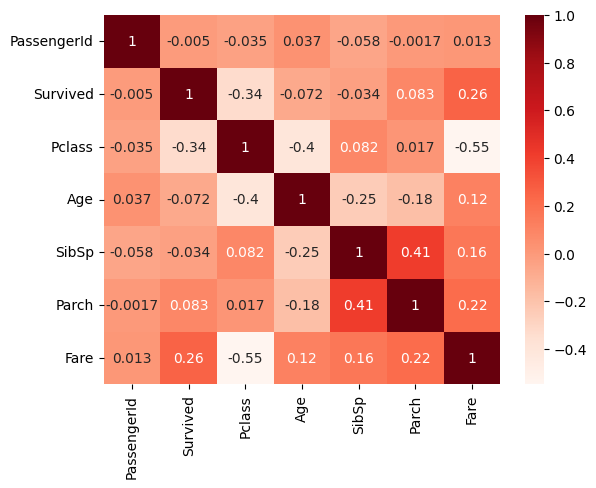

In [20]:
dataplot=sns.heatmap(data.corr(),cmap='Reds',annot=True)
plt.show()

From the above correlation heatmap we can conclude that the passenger id dont show any affect on output column so we can remove it from the data

In [16]:
from sklearn.preprocessing import LabelEncoder as LE

Even after removing ids there is still columns with string datatype which cant be correlated so we need to convert them into numerical data to perform operations on it. So we need to use LabelEncoder which is used for labelling data

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
print(data.nunique())

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             94
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64


In [38]:
le=LE()
data_in=data.drop(['PassengerId','Name','Ticket'], axis=1)
data_out=data['Survived']


In [39]:
data_in['Embarked']=le.fit_transform(data['Embarked'])
data_in['Sex']=le.fit_transform(data['Sex'])

In [40]:
data_in.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.272115,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,13.247458,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.750000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,26.507589,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [41]:
data_in.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


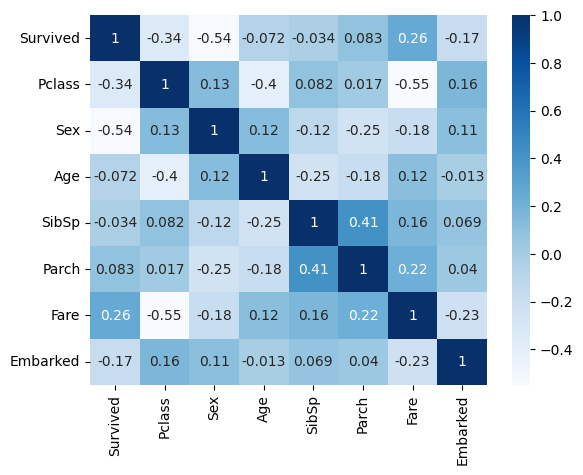

In [42]:
x=data_in.corr()
y=sns.heatmap(x,cmap="Blues",annot=True)
plt.show()

Thus the columns correlate with output column Survived

In [43]:
data_in=data_in.drop('Survived',axis=1)

Now we need to train the data

In [44]:
x_train,x_test,y_train,y_test=tts(data_in,data_out,test_size=0.2,random_state=109)

In [49]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_test_pred=lr.predict(x_test)
y_train_pred=lr.predict(x_train)

In [52]:
cm_test=confusion_matrix(y_test,y_test_pred)
cm_train=confusion_matrix(y_train,y_train_pred)


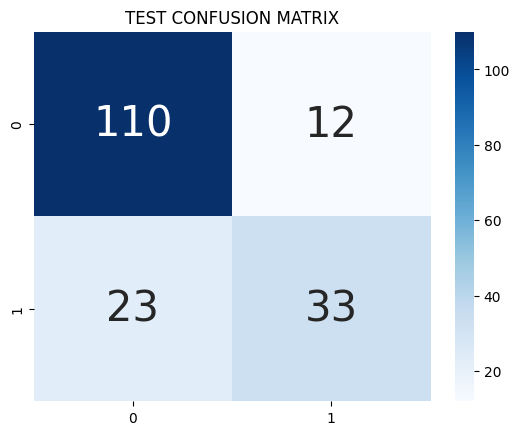

In [55]:
ax=plt.axes()
sns.heatmap(cm_test,annot=True,annot_kws={"size":30},fmt='d',cmap="Blues",ax=ax)
ax.set_title('TEST CONFUSION MATRIX') 
plt.show()

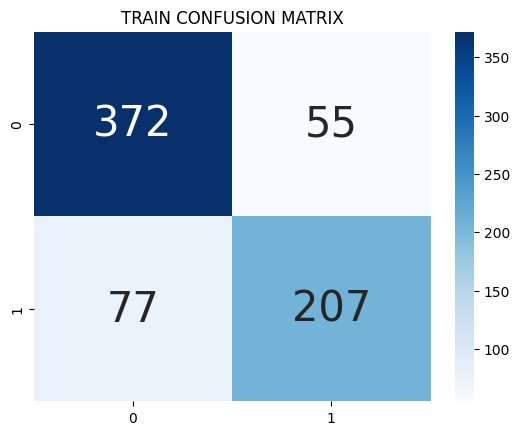

In [56]:
ax=plt.axes()
sns.heatmap(cm_train,annot=True,annot_kws={"size":30},fmt='d',cmap="Blues",ax=ax)
ax.set_title('TRAIN CONFUSION MATRIX') 
plt.show()

In [61]:
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_test_pred,y_test))

0.8143459915611815
0.8033707865168539
